In [2]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
cofactorsmapped = pd.read_csv("data/cofactors_mapped_combined.csv", usecols=["Gene Name", "Complex", "Subcomplex or Module", "Own-complex paralog", "Other-complex Paralogues", "UniprotID", "Bgee"])
cofactorsmapped.head()

,Gene Name,Complex,Subcomplex or Module,Own-complex paralog,Other-complex Paralogues,UniprotID,Bgee
0,BAF180,BAF,esBAF,NaN,NaN,Q86U86,ENSG00000163939
1,BAF180,BAF,npBAF,NaN,NaN,Q86U86,ENSG00000163939
2,BAF180,BAF,nBAF,NaN,NaN,Q86U86,ENSG00000163939
3,BCL11A,BAF,esBAF,[BCL11B],NaN,Q9H165,ENSG00000119866
4,BCL11A,BAF,npBAF,[BCL11B],NaN,Q9H165,ENSG00000119866


In [4]:
cofactorspecificity = pd.read_csv("helperdata/cofactor_specificity.csv").drop("Unnamed: 0", axis=1)
cofactorspecificity.head()

,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
0,POLR2J,ENSG00000005075,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,{'Oocytes': '679.3'},NaN,NaN,NaN,NaN,0.24,0.11,0.05,0.31,Not available
1,CREBBP,ENSG00000005339,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.27,0.58,0.09,0.24,0.13
2,PAF1,ENSG00000006712,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.14,0.10,0.05,0.28,0.28
3,MED24,ENSG00000008838,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Basal respiratory cells': '193.3', 'Ionocyte...",Low cell type specificity,Detected in all,NaN,NaN,0.22,0.26,0.05,0.48,0.08
4,ELOA,ENSG00000011007,Low tissue specificity,Detected in many,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.26,0.18,0.05,0.28,0.12


In [5]:
tissuespecific = cofactorspecificity[cofactorspecificity["RNA tissue specificity"] != "Low tissue specificity"]
print(len(tissuespecific))
tissuespecific.head()

15


,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
5,DPF1,ENSG00000011332,Tissue enriched,Detected in some,13.0,{'brain': '33.4'},Cell type enhanced,Detected in some,NaN,"{'Bipolar cells': '13.0', 'Early spermatids': ...",Low cell type specificity,Detected in many,NaN,NaN,0.92,Not detected,0.26,0.82,0.32
19,ACTL6B,ENSG00000077080,Group enriched,Detected in some,8.0,"{'brain': '52.2', 'pituitary gland': '14.9'}",Group enriched,Detected in some,4.0,"{'Cone photoreceptor cells': '11.9', 'Excitato...",Low cell type specificity,Detected in many,NaN,NaN,0.94,Not detected,0.25,0.92,0.31
21,MLLT10,ENSG00000078403,Tissue enhanced,Detected in all,NaN,{'testis': '90.2'},Cell type enhanced,Detected in all,NaN,"{'Excitatory neurons': '194.5', 'Inhibitory ne...",Low cell type specificity,Detected in all,NaN,NaN,0.37,0.30,0.11,0.37,0.06
23,SMARCD3,ENSG00000082014,Tissue enhanced,Detected in all,NaN,"{'brain': '148.4', 'skeletal muscle': '124.0'}",Cell type enhanced,Detected in many,NaN,"{'Cardiomyocytes': '60.9', 'Peritubular cells'...",Low cell type specificity,Detected in all,NaN,NaN,0.40,0.81,0.11,0.54,0.15
29,CCNK,ENSG00000090061,Tissue enhanced,Detected in all,NaN,{'bone marrow': '101.0'},Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.34,0.27,0.08,0.27,0.20


In [6]:
tissuespecific

,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
5,DPF1,ENSG00000011332,Tissue enriched,Detected in some,13.0,{'brain': '33.4'},Cell type enhanced,Detected in some,NaN,"{'Bipolar cells': '13.0', 'Early spermatids': ...",Low cell type specificity,Detected in many,NaN,NaN,0.92,Not detected,0.26,0.82,0.32
19,ACTL6B,ENSG00000077080,Group enriched,Detected in some,8.0,"{'brain': '52.2', 'pituitary gland': '14.9'}",Group enriched,Detected in some,4.0,"{'Cone photoreceptor cells': '11.9', 'Excitato...",Low cell type specificity,Detected in many,NaN,NaN,0.94,Not detected,0.25,0.92,0.31
21,MLLT10,ENSG00000078403,Tissue enhanced,Detected in all,NaN,{'testis': '90.2'},Cell type enhanced,Detected in all,NaN,"{'Excitatory neurons': '194.5', 'Inhibitory ne...",Low cell type specificity,Detected in all,NaN,NaN,0.37,0.30,0.11,0.37,0.06
23,SMARCD3,ENSG00000082014,Tissue enhanced,Detected in all,NaN,"{'brain': '148.4', 'skeletal muscle': '124.0'}",Cell type enhanced,Detected in many,NaN,"{'Cardiomyocytes': '60.9', 'Peritubular cells'...",Low cell type specificity,Detected in all,NaN,NaN,0.40,0.81,0.11,0.54,0.15
29,CCNK,ENSG00000090061,Tissue enhanced,Detected in all,NaN,{'bone marrow': '101.0'},Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.34,0.27,0.08,0.27,0.20
40,SUPT20H,ENSG00000102710,Tissue enhanced,Detected in all,NaN,{'testis': '55.0'},Cell type enhanced,Detected in all,NaN,"{'Early spermatids': '203.9', 'Spermatocytes':...",Low cell type specificity,Detected in all,NaN,NaN,0.38,0.13,0.08,0.42,0.11
47,DOT1L,ENSG00000104885,Tissue enhanced,Detected in all,NaN,{'testis': '63.1'},Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.45,Not detected,0.08,0.37,0.24
49,MED26,ENSG00000105085,Tissue enhanced,Detected in all,NaN,{'testis': '34.9'},Cell type enhanced,Detected in all,NaN,"{'dendritic cells': '59.3', 'Early spermatids'...",Not detected,Not detected,NaN,NaN,0.56,0.69,0.04,0.51,Not detected
69,BCL11A,ENSG00000119866,Tissue enhanced,Detected in many,NaN,"{'brain': '46.8', 'lymphoid tissue': '39.6', '...",Cell type enhanced,Detected in many,NaN,"{'B-cells': '210.9', 'Basal squamous epithelia...",Low cell type specificity,Detected in many,NaN,NaN,0.59,0.66,0.29,0.63,0.39
71,EPC1,ENSG00000120616,Tissue enriched,Detected in all,5.0,{'bone marrow': '147.7'},Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.45,0.30,0.16,0.23,0.11


In [7]:
singlecellspecific = cofactorspecificity[cofactorspecificity["RNA single cell type specificity"] != "Low cell type specificity"]
print(len(singlecellspecific))
singlecellspecific.head()

81


,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
0,POLR2J,ENSG00000005075,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,{'Oocytes': '679.3'},NaN,NaN,NaN,NaN,0.24,0.11,0.05,0.31,Not available
3,MED24,ENSG00000008838,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Basal respiratory cells': '193.3', 'Ionocyte...",Low cell type specificity,Detected in all,NaN,NaN,0.22,0.26,0.05,0.48,0.08
5,DPF1,ENSG00000011332,Tissue enriched,Detected in some,13.0,{'brain': '33.4'},Cell type enhanced,Detected in some,NaN,"{'Bipolar cells': '13.0', 'Early spermatids': ...",Low cell type specificity,Detected in many,NaN,NaN,0.92,Not detected,0.26,0.82,0.32
6,MNAT1,ENSG00000020426,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Excitatory neurons': '352.9', 'Inhibitory ne...",Low cell type specificity,Detected in all,NaN,NaN,0.30,0.32,0.06,0.40,0.09
9,MED17,ENSG00000042429,Low tissue specificity,Detected in many,NaN,NaN,Cell type enhanced,Detected in many,NaN,{'Rod photoreceptor cells': '49.4'},Low cell type specificity,Detected in all,NaN,NaN,0.36,0.25,0.17,0.39,0.11


In [8]:
specific = pd.concat([tissuespecific, singlecellspecific]).drop_duplicates()
print(len(specific))
specific.head()

84


,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
5,DPF1,ENSG00000011332,Tissue enriched,Detected in some,13.0,{'brain': '33.4'},Cell type enhanced,Detected in some,NaN,"{'Bipolar cells': '13.0', 'Early spermatids': ...",Low cell type specificity,Detected in many,NaN,NaN,0.92,Not detected,0.26,0.82,0.32
19,ACTL6B,ENSG00000077080,Group enriched,Detected in some,8.0,"{'brain': '52.2', 'pituitary gland': '14.9'}",Group enriched,Detected in some,4.0,"{'Cone photoreceptor cells': '11.9', 'Excitato...",Low cell type specificity,Detected in many,NaN,NaN,0.94,Not detected,0.25,0.92,0.31
21,MLLT10,ENSG00000078403,Tissue enhanced,Detected in all,NaN,{'testis': '90.2'},Cell type enhanced,Detected in all,NaN,"{'Excitatory neurons': '194.5', 'Inhibitory ne...",Low cell type specificity,Detected in all,NaN,NaN,0.37,0.30,0.11,0.37,0.06
23,SMARCD3,ENSG00000082014,Tissue enhanced,Detected in all,NaN,"{'brain': '148.4', 'skeletal muscle': '124.0'}",Cell type enhanced,Detected in many,NaN,"{'Cardiomyocytes': '60.9', 'Peritubular cells'...",Low cell type specificity,Detected in all,NaN,NaN,0.40,0.81,0.11,0.54,0.15
29,CCNK,ENSG00000090061,Tissue enhanced,Detected in all,NaN,{'bone marrow': '101.0'},Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.34,0.27,0.08,0.27,0.20


In [9]:
df = specific[["Ensembl", "Gene", "RNA single cell type specific nTPM"]]

cellspecific_cells = pd.DataFrame({"Cell Type": [], "Genes": [], "Ensembl": []}).set_index("Cell Type")

for _, row in df.iterrows():
    celldict = row["RNA single cell type specific nTPM"]
    if pd.notna(celldict):
        cell_dict = ast.literal_eval(celldict)
        for cell, _ in cell_dict.items():
            if cell not in cellspecific_cells.index.to_list():
                cellspecific_cells.loc[cell] = [[], []]
            cellspecific_cells.at[cell, "Genes"].append(row["Gene"])
            cellspecific_cells.at[cell, "Ensembl"].append(row["Ensembl"])

cellspecific_cells.head()

,Genes,Ensembl
Cell Type,,
Bipolar cells,[DPF1],[ENSG00000011332]
Early spermatids,"[DPF1, SUPT20H, MED26, DPF3, ELL, CCNT1, CCNH,...","[ENSG00000011332, ENSG00000102710, ENSG0000010..."
Excitatory neurons,"[DPF1, ACTL6B, MLLT10, BCL11A, MED12L, MNAT1, ...","[ENSG00000011332, ENSG00000077080, ENSG0000007..."
Horizontal cells,"[DPF1, ACTL6B]","[ENSG00000011332, ENSG00000077080]"
Inhibitory neurons,"[DPF1, ACTL6B, MLLT10, BCL11A, BCL11B, MED12L,...","[ENSG00000011332, ENSG00000077080, ENSG0000007..."


In [10]:
taus = cofactorspecificity.set_index("Ensembl")
taus = taus.loc[:, ["TAU" in i for i in taus.columns.to_list()]]
taus = taus.sort_values("TAU score - Single Cell Type", ascending=False)
taus.head()

,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,
ENSG00000077080,0.94,Not detected,0.25,0.92,0.31
ENSG00000144893,0.68,0.88,0.26,0.84,0.28
ENSG00000011332,0.92,Not detected,0.26,0.82,0.32
ENSG00000127152,0.82,0.73,0.45,0.74,0.51
ENSG00000205683,0.86,Not detected,0.44,0.73,0.47


# Paralogs

In [ ]:
owncomplexparalog = cofactorsmapped[pd.notna(cofactorsmapped["Own-complex paralog"])][["Gene Name", "Complex", "Subcomplex or Module", "Own-complex paralog", "Bgee"]]
owncomplexparalog = owncomplexparalog.explode("Own-complex paralog").groupby("Bgee").agg(lambda x: list(set(x)))
owncomplexparalog["Own-complex paralog"] = owncomplexparalog["Own-complex paralog"].apply(lambda x: x[0].replace("[", "").replace("]", "").split(", "))
owncomplexparalog["Gene Name"] = owncomplexparalog["Gene Name"].apply(lambda x: x[0])
owncomplexparalog["Complex"] = owncomplexparalog["Complex"].apply(lambda x: x[0])

owncomplexparalog["Paralog Ensembl"] = owncomplexparalog["Own-complex paralog"].apply(
    lambda x: [owncomplexparalog[owncomplexparalog["Gene Name"] == i].index.to_list()[0] for i in x])

genenames_lst = []
ensembls_lst = []

for row_i in range(len(owncomplexparalog)):
    row = owncomplexparalog.iloc[row_i]
    genenames = row["Own-complex paralog"].copy()
    gene = row["Gene Name"]
    ensembls = row["Paralog Ensembl"].copy()
    ensembl = row.name
    genenames.append(gene)
    ensembls.append(ensembl)
    genenames_lst.append(genenames)
    ensembls_lst.append(ensembls)

owncomplexparalog["Gene Names"] = genenames_lst
owncomplexparalog["Ensembls"] = ensembls_lst
owncomplexparalog["Gene Names"] = owncomplexparalog["Gene Names"].apply(lambda x: list(set(x)))
owncomplexparalog["Ensembls"] = owncomplexparalog["Ensembls"].apply(lambda x: list(set(x)))

owncomplexparalog.head()

IndexError: list index out of range

In [233]:
owncomplexparalogs_unique = owncomplexparalog[["Gene Names", "Ensembls"]]
owncomplexparalogs_unique["Gene Names"] = owncomplexparalogs_unique["Gene Names"].apply(lambda x: tuple(sorted(x)))
owncomplexparalogs_unique["Ensembls"] = owncomplexparalogs_unique["Ensembls"].apply(lambda x: tuple(sorted(x)))

owncomplexparalogs_unique = owncomplexparalogs_unique.drop_duplicates().reset_index().drop("Bgee", axis=1)
owncomplexparalogs_unique.head()

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_31160/3365975605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owncomplexparalogs_unique["Gene Names"] = owncomplexparalogs_unique["Gene Names"].apply(lambda x: tuple(sorted(x)))
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_31160/3365975605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owncomplexparalogs_unique["Ensembls"] = owncomplexparalogs_unique["Ensembls"].apply(lambda x: tuple(sorted(x)))


,Gene Names,Ensembls
0,"(BAF45B, BAF45C)","(ENSG00000011332, ENSG00000205683)"
1,"(BAF250A, BAF250B)","(ENSG00000049618, ENSG00000117713)"
2,"(BAF60A, BAF60B)","(ENSG00000066117, ENSG00000108604)"
3,"(BRG1, BRM)","(ENSG00000080503, ENSG00000127616)"
4,"(BAF60A, BAF60C)","(ENSG00000066117, ENSG00000082014)"


In [234]:
paralog_taus = owncomplexparalog.join(taus)
paralog_taus["Gene Names"] = paralog_taus["Gene Names"].apply(lambda x: tuple(sorted(x)))
paralog_taus["Ensembls"] = paralog_taus["Ensembls"].apply(lambda x: tuple(sorted(x)))
paralog_taus = paralog_taus.iloc[:, 5:]
paralog_taus.groupby(["Gene Names", "Ensembls"]).agg(list)

,,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Gene Names,Ensembls,,,,,
"(BAF250A, BAF250B)","(ENSG00000049618, ENSG00000117713)","[0.2, 0.24]","[0.39, 0.36]","[0.08, 0.12]","[0.29, 0.18]","[0.07, 0.17]"
"(BAF45A, BAF45D)","(ENSG00000130024, ENSG00000133884)","[0.13, 0.13]","[0.42, 0.15]","[0.04, 0.11]","[0.28, 0.35]","[0.26, 0.12]"
"(BAF45B, BAF45C)","(ENSG00000011332, ENSG00000205683)","[0.92, 0.86]","[Not detected, Not detected]","[0.26, 0.44]","[0.82, 0.73]","[0.32, 0.47]"
"(BAF60A, BAF60B)","(ENSG00000066117, ENSG00000108604)","[0.21, 0.22]","[0.28, 0.24]","[0.05, 0.1]","[0.28, 0.29]","[0.15, 0.35]"
"(BAF60A, BAF60C)","(ENSG00000066117, ENSG00000082014)",[0.4],[0.81],[0.11],[0.54],[0.15]
"(BCL11A, BCL11B)","(ENSG00000119866, ENSG00000127152)","[0.59, 0.82]","[0.66, 0.73]","[0.29, 0.45]","[0.63, 0.74]","[0.39, 0.51]"
"(BCL7A, BCL7B, BCL7C)","(ENSG00000099385, ENSG00000106635, ENSG00000110987)","[0.2, 0.29, 0.44]","[0.21, 0.14, 0.86]","[0.04, 0.07, 0.18]","[0.32, 0.27, 0.41]","[0.18, 0.16, 0.19]"
"(BRG1, BRM)","(ENSG00000080503, ENSG00000127616)","[0.23, 0.22]","[0.27, 0.19]","[0.06, 0.05]","[0.27, 0.2]","[0.12, 0.13]"
"(CDK19, CDK8)","(ENSG00000132964, ENSG00000155111)","[0.44, 0.39]","[Not detected, 0.72]","[0.13, 0.17]","[0.52, 0.53]","[0.15, 0.31]"


In [235]:
taus

,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,
ENSG00000077080,0.94,Not detected,0.25,0.92,0.31
ENSG00000144893,0.68,0.88,0.26,0.84,0.28
ENSG00000011332,0.92,Not detected,0.26,0.82,0.32
ENSG00000127152,0.82,0.73,0.45,0.74,0.51
ENSG00000205683,0.86,Not detected,0.44,0.73,0.47
...,...,...,...,...,...
ENSG00000139613,0.15,0.25,0.05,0.18,0.30
ENSG00000032219,0.37,0.30,0.10,0.18,0.08
ENSG00000117713,0.24,0.36,0.12,0.18,0.17


In [236]:
taus = taus.applymap(lambda x: np.NaN if x == "Not detected" or x == "Not available" else float(x))
taus.head()

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_31160/1269900617.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  taus = taus.applymap(lambda x: np.NaN if x == "Not detected" or x == "Not available" else float(x))


,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,
ENSG00000077080,0.94,NaN,0.25,0.92,0.31
ENSG00000144893,0.68,0.88,0.26,0.84,0.28
ENSG00000011332,0.92,NaN,0.26,0.82,0.32
ENSG00000127152,0.82,0.73,0.45,0.74,0.51
ENSG00000205683,0.86,NaN,0.44,0.73,0.47


<Axes: ylabel='Ensembl'>

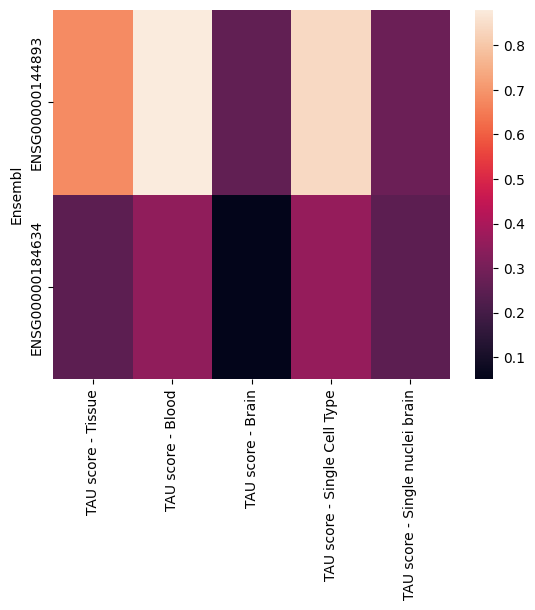

In [237]:
genepair = ("ENSG00000144893", "ENSG00000184634")
pair = taus.loc[[i in genepair for i in taus.index.to_list()]]
sns.heatmap(pair)


### scRNA

In [12]:
scRNA = pd.read_csv("helperdata/cofactor_scRNA.csv").set_index("Ensembl").drop("Unnamed: 0", axis = 1)
scRNA.head()

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000005075,POLR2J,87.8,71.4,101.6,17.0,75.9,95.5,101.4,181.5,76.2,...,73.4,112.2,96.7,123.6,234.4,115.6,132.0,188.5,85.9,121.2
ENSG00000005339,CREBBP,45.6,32.7,30.4,86.4,41.1,45.2,34.0,16.2,34.3,...,38.1,48.8,39.7,36.1,44.4,32.0,45.7,32.2,49.9,23.8
ENSG00000006712,PAF1,25.8,20.3,26.7,9.0,44.5,41.1,31.7,29.9,50.3,...,21.8,19.5,27.3,89.6,24.7,38.3,44.7,71.1,43.9,19.0
ENSG00000008838,MED24,15.5,16.9,31.7,12.4,12.1,10.1,11.0,193.3,12.6,...,8.2,14.6,10.2,12.6,13.4,11.5,13.5,20.7,10.7,28.5
ENSG00000011007,ELOA,24.1,60.2,79.2,8.4,31.5,43.4,28.1,29.8,29.5,...,8.2,17.6,21.5,55.1,27.9,32.0,52.7,48.8,25.5,15.4


In [13]:
paralogscrna = owncomplexparalog[["Ensembls"]].join(scRNA)
paralogscrna["Ensembls"] = paralogscrna["Ensembls"].apply(lambda x: tuple(sorted(x)))
paralogscrna.head()


KeyError: "None of [Index(['Ensembls'], dtype='object')] are in the [columns]"

In [14]:
genepair = ("ENSG00000011332", "ENSG00000205683")
pair = paralogscrna.loc[[i in genepair for i in paralogscrna.index.to_list()]]
pair = pair.set_index("Gene").drop("Ensembls", axis=1)

plt.figure(figsize=(20, 40))
sns.heatmap(pair.T, cmap = "flare")

NameError: name 'paralogscrna' is not defined

### P300

In [15]:
cofactorsmapped["Complex"].unique()

array(['BAF', 'Chromatin Remodelers', 'Mediator', 'P300-CBP', 'SAGA',
       'HATS', 'TFIID', 'TFIIB', 'TFIIA', 'TFIIE', 'TFIIF', 'TFIIH',
       'FACT', 'NELF/DSIF', 'Integrator', 'SET/COMPASS', 'Elongation',
       'RNA Pol II', 'CDKs', 'NCOA'], dtype=object)

In [16]:
cofactorsmapped[cofactorsmapped["Complex"] == "P300-CBP"]

,Gene Name,Complex,Subcomplex or Module,Own-complex paralog,Other-complex Paralogues,UniprotID,Bgee
127,EP300,P300-CBP,P300,NaN,NaN,Q09472,ENSG00000100393
128,CREBBP,P300-CBP,CBP,NaN,NaN,Q92793,ENSG00000005339


In [17]:
cofactorspecificity[cofactorspecificity["Gene"] == "CREBBP"]

,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
1,CREBBP,ENSG00000005339,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.27,0.58,0.09,0.24,0.13


In [18]:
scRNA[scRNA["Gene"] == "EP300"]

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000100393,EP300,40.4,41.3,39.4,55.1,49.9,37.1,53.2,16.4,35.0,...,27.2,37.1,35.5,24.7,28.3,30.3,38.0,33.4,50.8,18.7


In [19]:
cofactorspecificity.sort_values("TAU score - Single Cell Type", ascending=False)

,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
19,ACTL6B,ENSG00000077080,Group enriched,Detected in some,8.0,"{'brain': '52.2', 'pituitary gland': '14.9'}",Group enriched,Detected in some,4.0,"{'Cone photoreceptor cells': '11.9', 'Excitato...",Low cell type specificity,Detected in many,NaN,NaN,0.94,Not detected,0.25,0.92,0.31
108,MED12L,ENSG00000144893,Tissue enhanced,Detected in some,NaN,"{'bone marrow': '3.8', 'testis': '4.0'}",Group enriched,Detected in many,4.0,"{'Astrocytes': '363.5', 'Excitatory neurons': ...",Cell type enhanced,Detected in all,NaN,{'choroid plexus epithelial cell': '1326.0'},0.68,0.88,0.26,0.84,0.28
5,DPF1,ENSG00000011332,Tissue enriched,Detected in some,13.0,{'brain': '33.4'},Cell type enhanced,Detected in some,NaN,"{'Bipolar cells': '13.0', 'Early spermatids': ...",Low cell type specificity,Detected in many,NaN,NaN,0.92,Not detected,0.26,0.82,0.32
79,BCL11B,ENSG00000127152,Group enriched,Detected in many,4.0,"{'brain': '12.4', 'lymphoid tissue': '35.7', '...",Cell type enhanced,Detected in many,NaN,"{'Basal keratinocytes': '83.9', 'Basal squamou...",Cell type enhanced,Detected in many,NaN,{'leukocyte': '662.6'},0.82,0.73,0.45,0.74,0.51
177,DPF3,ENSG00000205683,Tissue enhanced,Detected in some,NaN,"{'brain': '5.2', 'heart muscle': '2.5', 'retin...",Cell type enhanced,Detected in many,NaN,"{'Astrocytes': '99.1', 'Cone photoreceptor cel...",Cell type enhanced,Detected in all,NaN,"{'hippocampal CA4': '365.3', 'upper rhombic li...",0.86,Not detected,0.44,0.73,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SMARCC2,ENSG00000139613,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.15,0.25,0.05,0.18,0.30
8,ARID4A,ENSG00000032219,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.37,0.30,0.10,0.18,0.08
65,ARID1A,ENSG00000117713,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.24,0.36,0.12,0.18,0.17
78,MED1,ENSG00000125686,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.19,0.19,0.07,0.18,0.09


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: ylabel='Gene'>

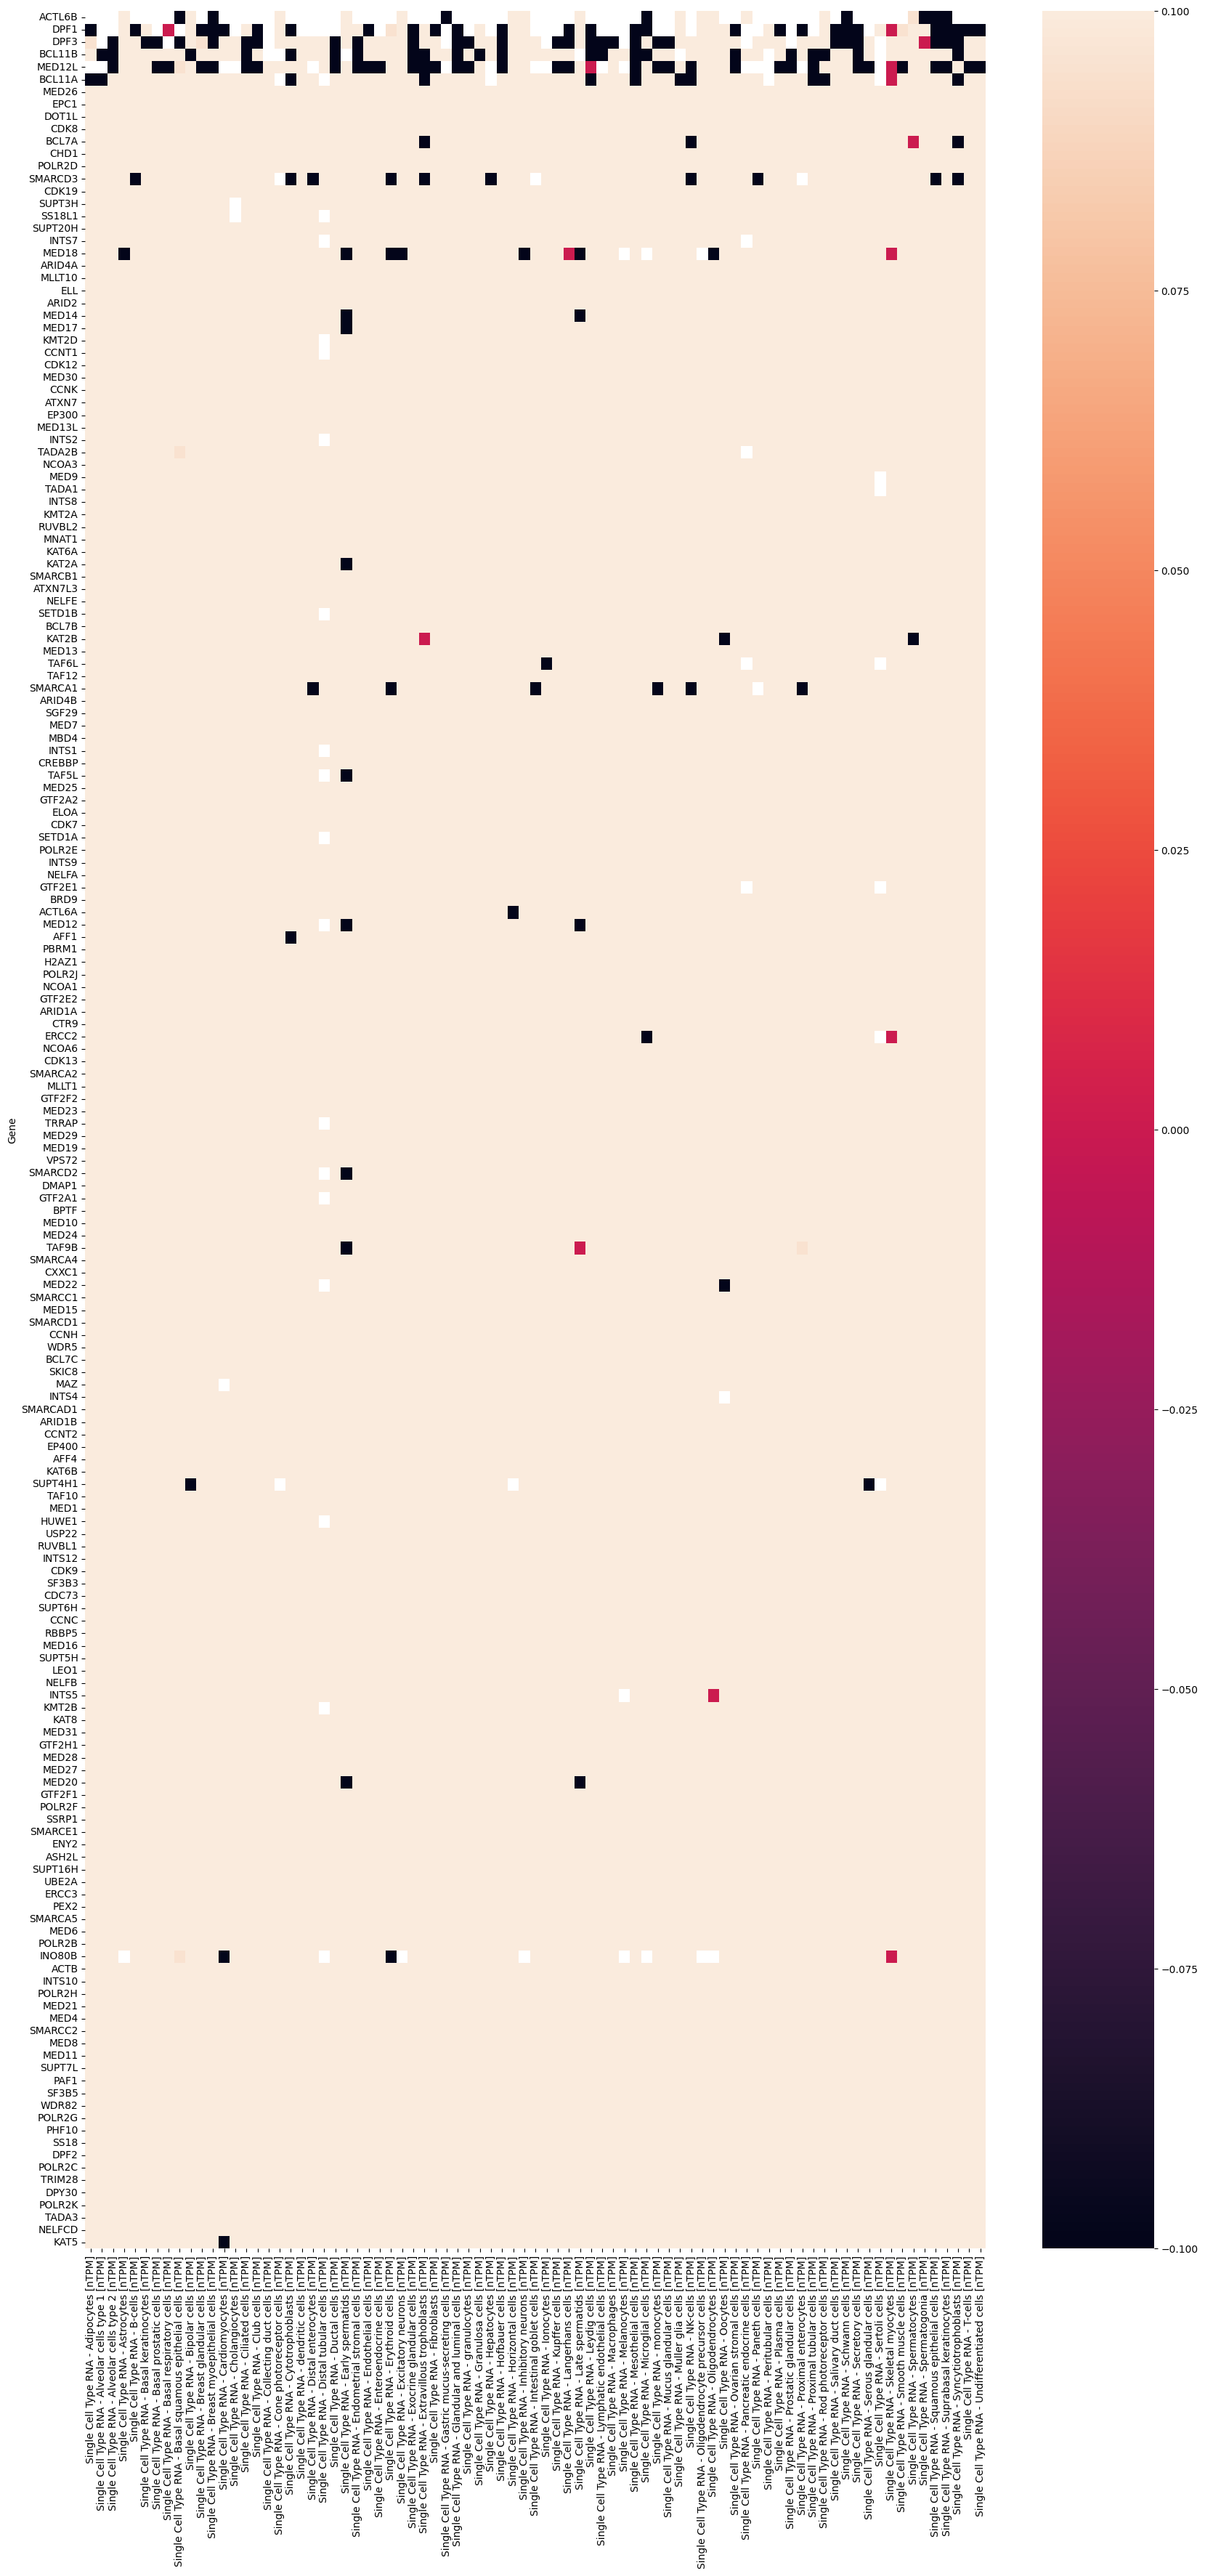

In [20]:
sortedbytissuetau = cofactorspecificity.sort_values("TAU score - Tissue", ascending=False)[["Ensembl"]].merge(scRNA, left_on="Ensembl", right_index=True).set_index("Gene").drop("Ensembl",axis=1)
plt.figure(figsize=(20, 40))
sns.heatmap(np.log(sortedbytissuetau))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: ylabel='Gene'>

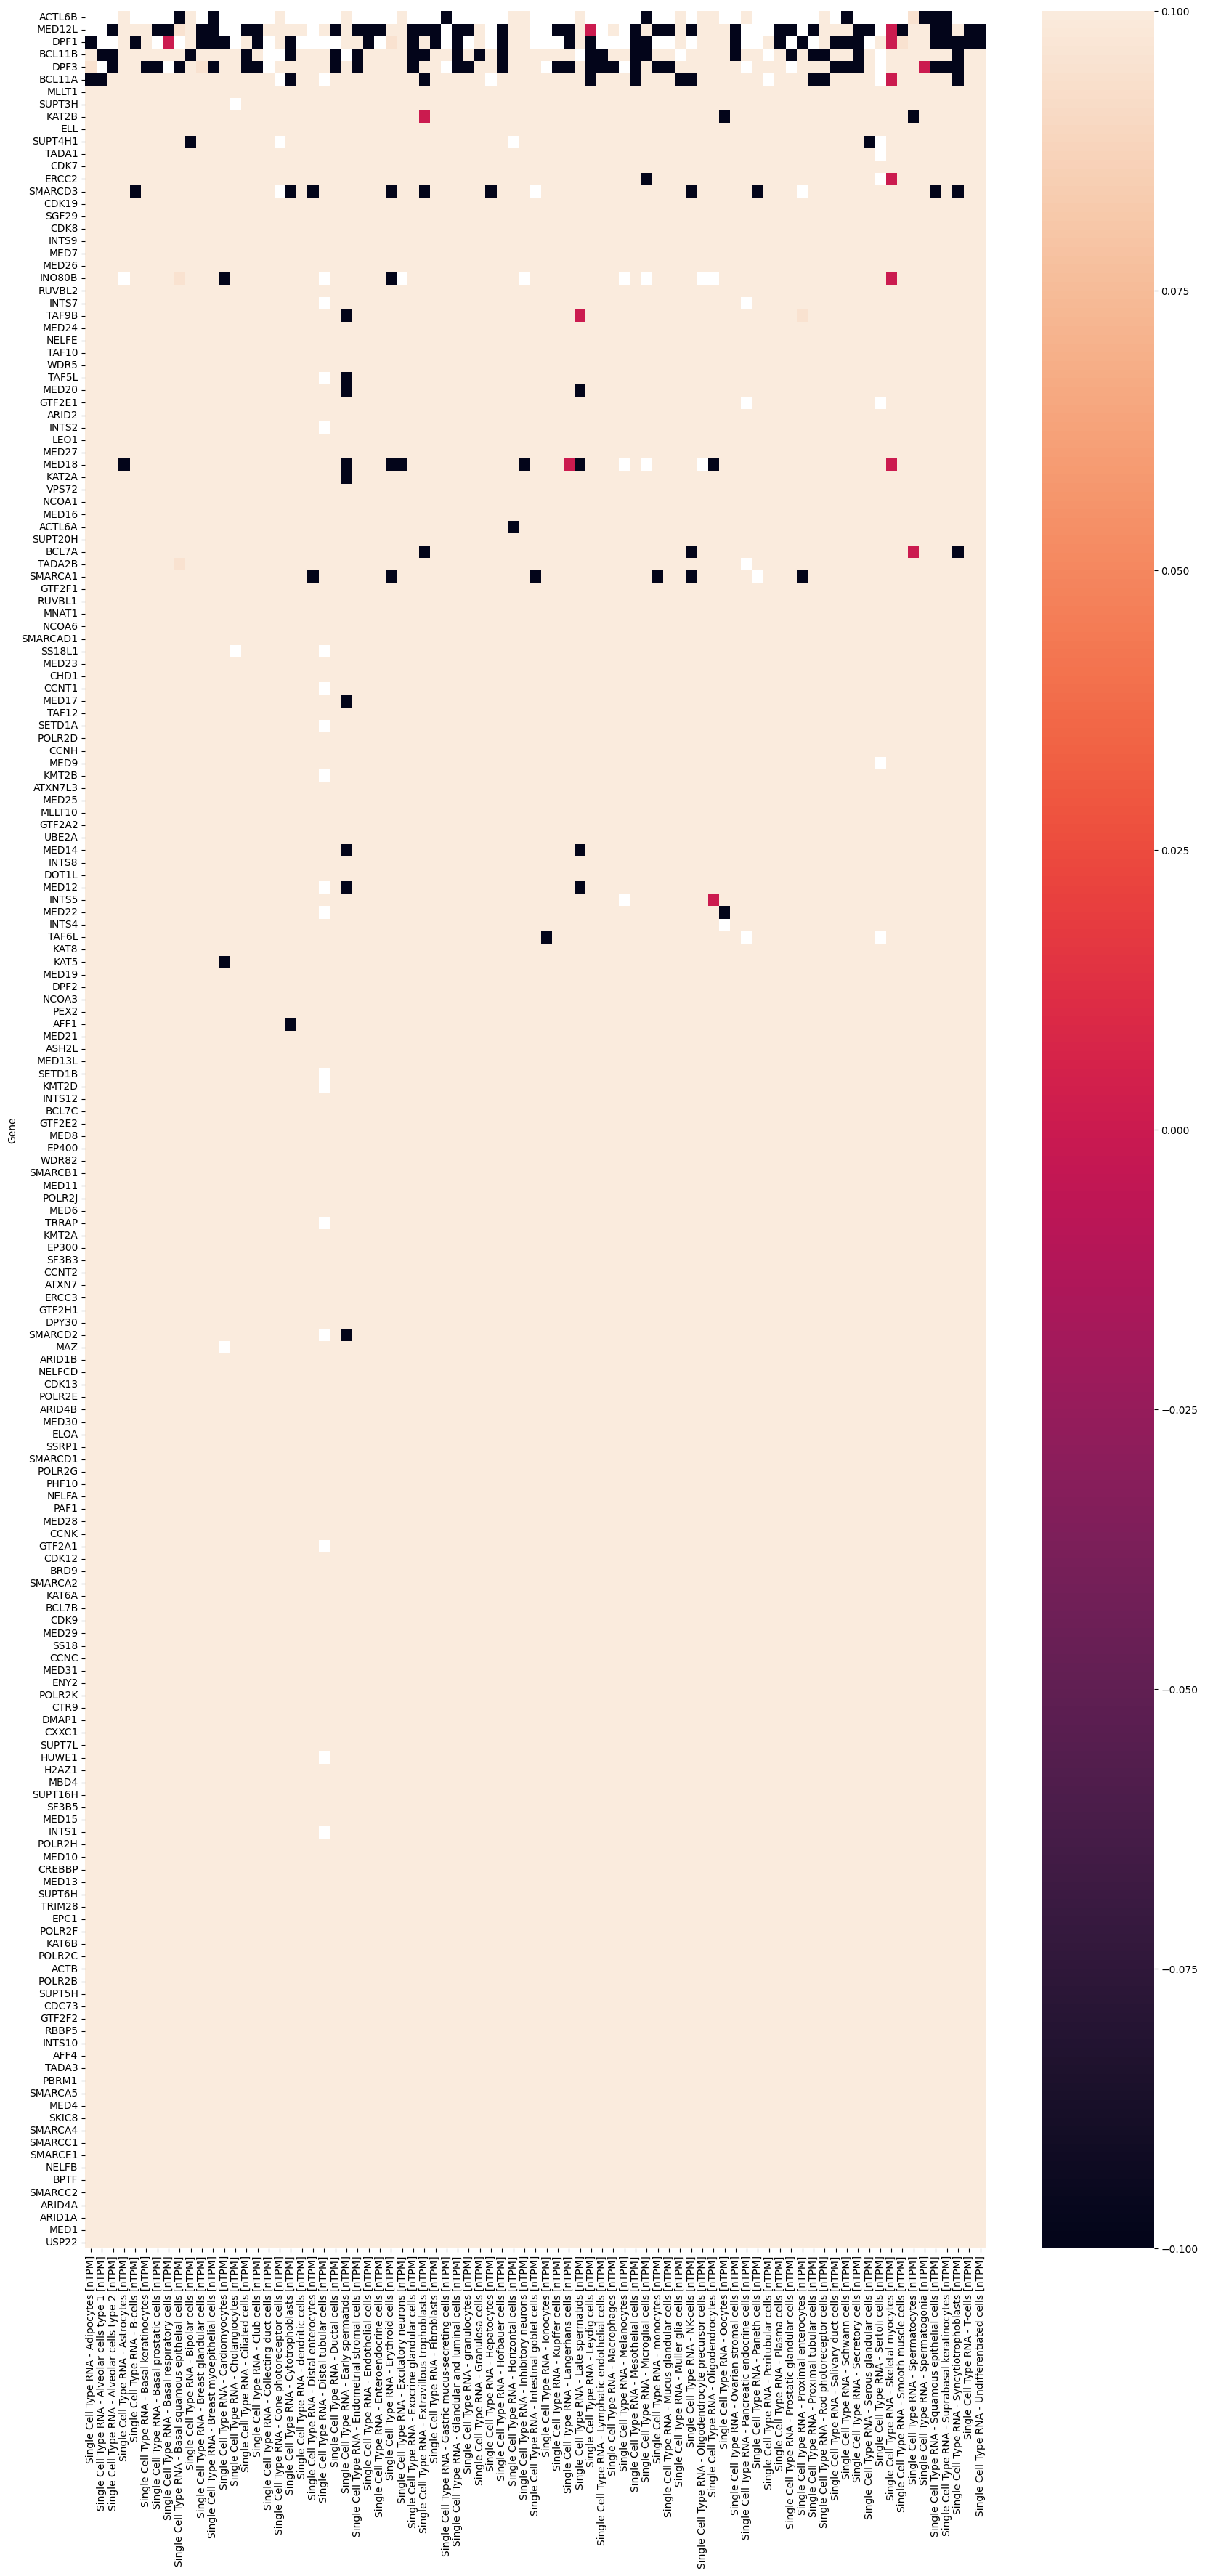

In [21]:
sortedbytissuetau = cofactorspecificity.sort_values("TAU score - Single Cell Type", ascending=False)[["Ensembl"]].merge(scRNA, left_on="Ensembl", right_index=True).set_index("Gene").drop("Ensembl",axis=1)
plt.figure(figsize=(20, 40))
sns.heatmap(np.log(sortedbytissuetau))

### Taus

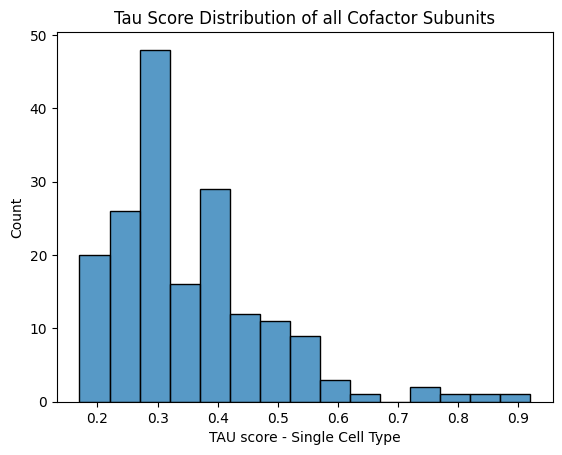

In [14]:
sns.histplot(cofactorspecificity["TAU score - Single Cell Type"])
plt.title("Tau Score Distribution of all Cofactor Subunits")
plt.savefig("figures/cofactortaudist.png")

## Transcription Factors

In [30]:
tf_specificity = pd.read_csv("helperdata/TF_specificity.csv").set_index("Gene")
tf_specificity.head()

,Unnamed: 0,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Gene,,,,,,,,,,,,,,,,,,,
TFAP2A,0,ENSG00000137203,Tissue enhanced,Detected in many,NaN,"{'breast': '31.9', 'skin 1': '64.9'}",Cell type enhanced,Detected in many,NaN,"{'Basal squamous epithelial cells': '158.0', '...",Cell type enriched,Detected in some,6.0,{'cerebellar inhibitory': '69.0'},0.70,Not detected,0.55,0.76,0.91
TFAP2B,0,ENSG00000008196,Tissue enhanced,Detected in some,NaN,"{'epididymis': '32.5', 'retina': '14.3'}",Group enriched,Detected in many,4.0,"{'Basal squamous epithelial cells': '92.0', 'H...",Cell type enriched,Detected in some,21.0,{'cerebellar inhibitory': '230.9'},0.85,Not detected,0.72,0.85,0.95
TFAP2C,0,ENSG00000087510,Tissue enhanced,Detected in many,NaN,"{'esophagus': '28.3', 'skin 1': '51.9'}",Cell type enhanced,Detected in many,NaN,"{'Basal keratinocytes': '95.0', 'Basal squamou...",Group enriched,Detected in some,4.0,"{'astrocyte': '3.4', 'endothelial cell': '6.0'...",0.67,Not detected,0.42,0.70,0.93
TFAP2D,0,ENSG00000008197,Not detected,Not detected,NaN,NaN,Cell type enhanced,Detected in some,NaN,"{'Horizontal cells': '2.5', 'Oocytes': '1.5'}",Cell type enhanced,Detected in some,NaN,"{'amygdala excitatory': '15.1', 'deep-layer in...",Not detected,Not detected,0.87,0.97,0.85
TFAP2E,0,ENSG00000116819,Tissue enriched,Detected in many,7.0,{'brain': '36.1'},Cell type enhanced,Detected in some,NaN,"{'Bipolar cells': '8.2', 'Excitatory neurons':...",Low cell type specificity,Detected in all,NaN,NaN,0.80,Not detected,0.32,0.79,0.25


In [31]:
tf_taus = tf_specificity.loc[:, ["TAU" in i for i in tf_specificity.columns.to_list()]]
tf_taus = tf_taus.applymap(lambda x: np.NaN if x == "Not detected" or x == "Not available" else float(x))
tf_taus.sort_values("TAU score - Single Cell Type", ascending=False)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_32355/2159412513.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tf_taus = tf_taus.applymap(lambda x: np.NaN if x == "Not detected" or x == "Not available" else float(x))


,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Gene,,,,,
RHOXF2B,0.99,NaN,NaN,1.0,NaN
LBX1,0.98,NaN,0.74,1.0,0.98
NOBOX,NaN,NaN,NaN,1.0,NaN
MYOG,0.93,NaN,0.57,1.0,NaN
FOXR2,0.99,NaN,NaN,1.0,NaN
...,...,...,...,...,...
HSFX1,0.52,NaN,0.22,NaN,NaN
HSFX2,0.79,NaN,0.32,NaN,NaN
HSFY1,0.96,NaN,NaN,NaN,NaN


In [24]:
tf_taus[tf_taus["TAU score - Single Cell Type"] > 0.95]

,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Gene,,,,,
TFAP2D,NaN,NaN,0.87,0.97,0.85
ASCL3,0.97,NaN,0.25,0.98,NaN
ASCL4,NaN,NaN,NaN,0.97,0.97
ATOH1,0.98,NaN,NaN,0.98,NaN
FIGLA,0.90,NaN,NaN,0.98,NaN
...,...,...,...,...,...
TBR1,0.98,NaN,0.60,0.96,0.76
TBX10,0.97,NaN,NaN,0.96,NaN
TBX22,0.97,NaN,NaN,0.99,0.92


In [25]:
tf_taus.loc["YY1"]

TAU score - Tissue                 0.17
TAU score - Blood                  0.27
TAU score - Brain                  0.06
TAU score - Single Cell Type       0.18
TAU score - Single nuclei brain    0.12
Name: YY1, dtype: float64

In [26]:
tf_scrna = pd.read_csv("helperdata/TF_scRNA.csv").drop("Unnamed: 0", axis=1)
tf_scrna.head()

,Gene,Ensembl,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
0,TFAP2A,ENSG00000137203,1.7,0.2,0.3,0.0,0.1,106.0,63.2,46.0,...,0.0,0.0,4.9,7.8,16.4,139.1,115.4,700.8,1.1,1.1
1,TFAP2B,ENSG00000008196,0.5,0.0,0.0,0.0,0.2,7.4,0.6,0.1,...,0.0,0.0,2.3,1.4,0.7,23.1,2.4,4.1,0.1,0.0
2,TFAP2C,ENSG00000087510,1.3,3.5,10.6,3.7,0.7,95.0,22.0,2.6,...,0.0,0.0,5.8,0.2,1.6,70.5,92.4,107.6,1.0,1.6
3,TFAP2D,ENSG00000008197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
4,TFAP2E,ENSG00000116819,0.2,0.2,0.5,4.6,0.2,2.0,0.0,0.2,...,0.0,0.0,0.4,2.2,0.2,0.4,2.8,0.3,0.5,0.2


In [27]:
tf_scrna_log = tf_scrna.drop("Ensembl", axis=1).set_index("Gene").applymap(lambda x: np.log(x) if x != 0 else x)
tf_scrna_log

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_32355/3388586198.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tf_scrna_log = tf_scrna.drop("Ensembl", axis=1).set_index("Gene").applymap(lambda x: np.log(x) if x != 0 else x)


,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
TFAP2A,0.530628,-1.609438,-1.203973,0.000000,-2.302585,4.663439,4.146304,3.828641,5.062595,1.629241,...,0.000000,0.000000,1.589235,2.054124,2.797281,4.935193,4.748404,6.552223,0.095310,0.095310
TFAP2B,-0.693147,0.000000,0.000000,0.000000,-1.609438,2.001480,-0.510826,-2.302585,4.521789,3.471966,...,0.000000,0.000000,0.832909,0.336472,-0.356675,3.139833,0.875469,1.410987,-2.302585,0.000000
TFAP2C,0.262364,1.252763,2.360854,1.308333,-0.356675,4.553877,3.091042,0.955511,4.653960,0.000000,...,0.000000,0.000000,1.757858,-1.609438,0.470004,4.255613,4.526127,4.678421,0.000000,0.470004
TFAP2D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-2.302585,0.000000,0.000000,0.000000,0.000000,0.000000
TFAP2E,-1.609438,-1.609438,-0.693147,1.526056,-1.609438,0.693147,0.000000,-1.609438,0.000000,2.104134,...,0.000000,0.000000,-0.916291,0.788457,-1.609438,-0.916291,1.029619,-1.203973,-0.693147,-1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THAP5,3.310543,3.222868,2.797281,2.197225,3.380995,2.572612,3.453157,2.091864,2.230014,3.696351,...,3.303217,3.306887,3.161247,3.668677,3.072693,2.066863,2.753661,2.681022,3.242592,2.646175
THAP6,2.332144,2.219203,2.312535,3.030134,2.879198,2.151762,2.476538,2.501436,2.667228,2.753661,...,1.686399,2.054124,2.631889,3.919991,2.827314,2.415914,2.128232,2.292535,2.906901,2.163323
THAP7,2.890372,3.254243,3.325036,1.774952,3.295837,2.873565,3.583519,3.210844,2.572612,3.086487,...,3.081910,3.234749,3.261935,5.173887,4.454347,2.809403,2.862201,3.471966,3.468856,3.246491


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x10000 with 0 Axes>

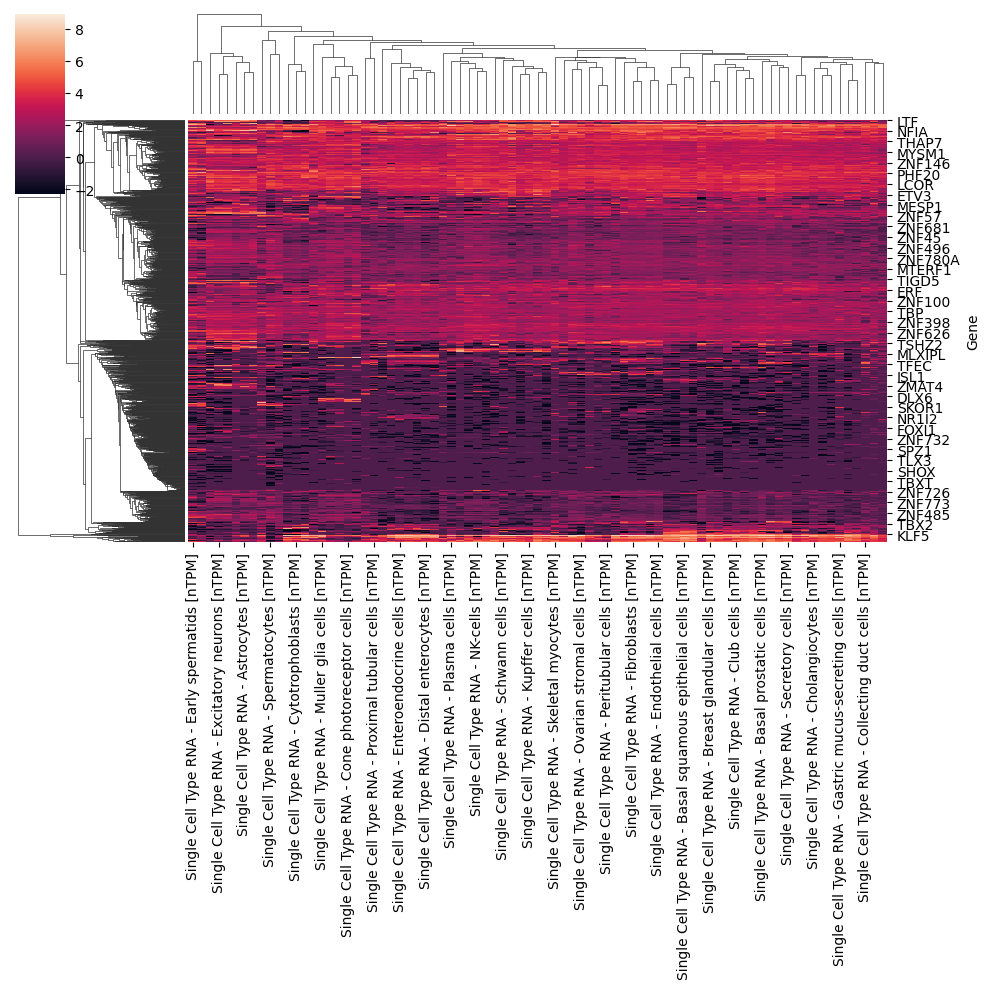

In [72]:
plt.figure(figsize=(10, 100))
sns.clustermap(tf_scrna_log)

### TF Taus of Cell-cycle specific TFs

In [43]:
cellcycletaus = pd.read_csv("helperdata/cellcycleTF_specificity.csv")
cellcycletaus.head()

,Unnamed: 0,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
0,0,SBF1,ENSG00000100241,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in many,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.33,0.43,0.08,0.31,0.28
1,1,SBF2,ENSG00000133812,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'Astrocytes': '213.0', 'Excitatory neurons': ...",Low cell type specificity,Detected in all,NaN,NaN,0.21,0.76,0.03,0.46,0.07
2,2,ZNF143,ENSG00000166478,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,{'Oocytes': '81.6'},Low cell type specificity,Detected in all,NaN,NaN,0.20,0.21,0.12,0.43,0.25
3,3,GPR15LG,ENSG00000188373,Group enriched,Detected in some,4.0,"{'esophagus': '187.8', 'intestine': '265.9', '...",Cell type enhanced,Detected in some,NaN,"{'Distal enterocytes': '1331.7', 'Enteroendocr...",Not detected,Not detected,NaN,NaN,0.82,Not detected,Not detected,0.88,Not detected
4,4,TRIM59,ENSG00000213186,Tissue enhanced,Detected in many,NaN,"{'bone marrow': '17.0', 'lymphoid tissue': '13...",Cell type enriched,Detected in many,14.0,{'Oligodendrocytes': '364.7'},Cell type enriched,Detected in all,6.0,{'oligodendrocyte': '479.9'},0.61,0.37,0.24,0.79,0.74


In [47]:
cellcycletaus[cellcycletaus["RNA single cell type specificity"] != "Low cell type specificity"]

,Unnamed: 0,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
1,1,SBF2,ENSG00000133812,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'Astrocytes': '213.0', 'Excitatory neurons': ...",Low cell type specificity,Detected in all,NaN,NaN,0.21,0.76,0.03,0.46,0.07
2,2,ZNF143,ENSG00000166478,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,{'Oocytes': '81.6'},Low cell type specificity,Detected in all,NaN,NaN,0.20,0.21,0.12,0.43,0.25
3,3,GPR15LG,ENSG00000188373,Group enriched,Detected in some,4.0,"{'esophagus': '187.8', 'intestine': '265.9', '...",Cell type enhanced,Detected in some,NaN,"{'Distal enterocytes': '1331.7', 'Enteroendocr...",Not detected,Not detected,NaN,NaN,0.82,Not detected,Not detected,0.88,Not detected
4,4,TRIM59,ENSG00000213186,Tissue enhanced,Detected in many,NaN,"{'bone marrow': '17.0', 'lymphoid tissue': '13...",Cell type enriched,Detected in many,14.0,{'Oligodendrocytes': '364.7'},Cell type enriched,Detected in all,6.0,{'oligodendrocyte': '479.9'},0.61,0.37,0.24,0.79,0.74
6,1,PCYOX1L,ENSG00000145882,Low tissue specificity,Detected in many,NaN,NaN,Cell type enhanced,Detected in many,NaN,{'Oocytes': '16.2'},Low cell type specificity,Detected in all,NaN,NaN,0.46,0.41,0.18,0.52,0.21
7,0,CHCHD6,ENSG00000159685,Tissue enhanced,Detected in all,NaN,{'brain': '63.2'},Cell type enhanced,Detected in many,NaN,"{'Hofbauer cells': '145.3', 'Melanocytes': '27...",Low cell type specificity,Detected in all,NaN,NaN,0.42,0.30,0.21,0.49,0.21
8,1,HELT,ENSG00000187821,Tissue enhanced,Detected in single,NaN,{'kidney': '1.4'},Group enriched,Detected in some,13.0,"{'Alveolar cells type 1': '2.1', 'Distal tubul...",Cell type enriched,Detected in single,5.0,{'choroid plexus epithelial cell': '1.5'},0.95,Not detected,0.72,0.99,0.99
9,0,ACE2,ENSG00000130234,Tissue enhanced,Detected in many,NaN,"{'gallbladder': '64.1', 'intestine': '237.9', ...",Cell type enriched,Detected in some,5.0,{'Proximal enterocytes': '201.8'},Cell type enhanced,Detected in some,NaN,"{'choroid plexus epithelial cell': '4.3', 'epe...",0.77,Not detected,0.53,0.90,0.76
10,1,BACE2,ENSG00000182240,Tissue enhanced,Detected in many,NaN,{'salivary gland': '26.0'},Cell type enhanced,Detected in many,NaN,"{'Melanocytes': '261.1', 'Mucus glandular cell...",Cell type enhanced,Detected in many,NaN,"{'endothelial cell': '303.0', 'mammillary body...",0.49,0.92,0.25,0.52,0.54
11,2,RCE1,ENSG00000173653,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,{'Extravillous trophoblasts': '70.1'},Low cell type specificity,Detected in all,NaN,NaN,0.29,0.17,0.19,0.40,0.16


In [41]:

def RNAcellspecificity(df):
    df = df[["Gene", "RNA single cell type specific nTPM"]]

    cellspecific_cells = pd.DataFrame({"Cell Type": [], "Genes": []}).set_index("Cell Type")

    for _, row in df.iterrows():
        celldict = row["RNA single cell type specific nTPM"]
        if pd.notna(celldict):
            cell_dict = ast.literal_eval(celldict)
            for cell, _ in cell_dict.items():
                if cell not in cellspecific_cells.index.to_list():
                    cellspecific_cells.loc[cell] = [[]]
                cellspecific_cells.at[cell, "Genes"].append(row["Gene"])

    return cellspecific_cells

RNAcellspecificity(cellcycletaus)

,Genes
Cell Type,
Astrocytes,"[SBF2, CLASP2, NICN1]"
Excitatory neurons,"[SBF2, CLASP2, HTR5A, NICN1, TPPP]"
Inhibitory neurons,"[SBF2, CLASP2, HTR5A, NICN1, TPPP]"
Microglial cells,"[SBF2, NICN1]"
Oligodendrocyte precursor cells,"[SBF2, CLASP2, NICN1]"
Oligodendrocytes,"[SBF2, TRIM59, CLASP2, NICN1, TPPP]"
Oocytes,"[ZNF143, PCYOX1L, CHCHD6, ERVK3-1]"
Distal enterocytes,[GPR15LG]
Enteroendocrine cells,[GPR15LG]


In [60]:
#TFs with neural specificity
TFSbycell = RNAcellspecificity(tf_specificity.reset_index())
excitatory = TFSbycell.loc["Excitatory neurons"][0]
inhibitory = TFSbycell.loc["Inhibitory neurons"][0]
astrocytes = TFSbycell.loc["Astrocytes"][0]

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_32355/1200084176.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  excitatory = TFSbycell.loc["Excitatory neurons"][0]
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_32355/1200084176.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inhibitory = TFSbycell.loc["Inhibitory neurons"][0]
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_32355/1200084176.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

In [71]:
overlap = list(set(excitatory) & set(inhibitory) & set(astrocytes))

len(tf_specificity), len(excitatory), len(inhibitory), len(astrocytes), len(overlap)

(1629, 153, 145, 125, 53)

In [75]:
len(list(set(excitatory) & set(inhibitory)))

108

In [79]:
from matplotlib_venn import venn3

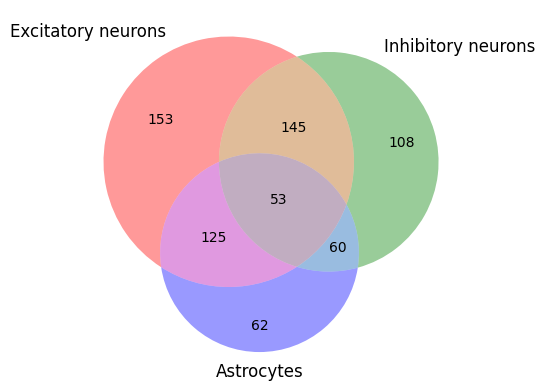

In [87]:
venn3(subsets = (len(excitatory), len(set(excitatory) & set(inhibitory)), 
                len(inhibitory), len(set(inhibitory) & set(astrocytes)),
                len(astrocytes), len(set(astrocytes) & set(excitatory)),
                len(set(excitatory) & set(inhibitory) & set(astrocytes))           
                ),
                set_labels = ('Excitatory neurons', 'Inhibitory neurons', 'Astrocytes'))

plt.savefig("figures/neuralTFvenndiagram.png")

In [68]:
RNAcellspecificity(tf_specificity.loc[overlap].reset_index())

,Genes
Cell Type,
Astrocytes,"[ZFP2, ZNF438, ZNF248, SOX5, ZFPM2, RARB, NPAS..."
Excitatory neurons,"[ZFP2, ZNF438, ZNF248, SOX5, ZFPM2, RARB, NPAS..."
Inhibitory neurons,"[ZFP2, ZNF438, ZNF248, SOX5, ZFPM2, RARB, NPAS..."
Oligodendrocyte precursor cells,"[ZFP2, ZNF438, ZNF248, SOX5, ZFPM2, NPAS2, ESR..."
Oligodendrocytes,"[ZFP2, ZNF438, ZNF248, ESRRG, ZSCAN23, ZNF718,..."
Microglial cells,"[ZNF438, SOX5, ZFPM2, NPAS2, ZNF718, ZEB1, KLF..."
Oocytes,"[ZFPM2, SMYD3, ZNF534]"
Early spermatids,"[NPAS2, ZSCAN23, RFX3, PKNOX2, ZFHX2, ZHX3, GC..."
Syncytiotrophoblasts,[ESRRG]
